# PYTHON SKLEARN PRE-PROCESSING + PIPELINE (22/30)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm

In [3]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

In [5]:
X = np.array(['Chat', 'Chien', 'Chat', 'Oiseau'])

In [6]:
# Encode le tableau de str, dévellope une fonction de transformation
# on va souvent utilisé cette méthode sur les données d'entrainement par exemple
transformer = LabelEncoder()
transformer.fit(X)

LabelEncoder()

In [7]:
# transforme les string en nombre, applique la fonction de transformation
# on va souvent appliquer cette méthode sur toutes les données
transformer.transform(X)

array([0, 1, 0, 2])

In [8]:
# Combine les 2 méthodes ci dessus
transformer.fit_transform(X)

array([0, 1, 0, 2], dtype=int64)

In [9]:
# Pipeline : chaine de transformation composée d'un transformeur et d'un estimateur

## Encodage

### Encodage ordinal

In [10]:
y = np.array(['chat',
              'chien',
              'chat',
              'oiseau'])

encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [11]:
# inverse l'encodage
encoder.inverse_transform(np.array([0, 1, 0, 2]))

array(['chat', 'chien', 'chat', 'oiseau'], dtype='<U6')

##### Plusieurs variables à encoder dans le tableau --> OrdinalEncoder

In [12]:
X = np.array([['chat', 'poils'],
              ['chien', 'poils'],
              ['chat', 'poils'],
              ['oiseau', 'plumes']])

In [13]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

Inconvénient, relation ordinal entre les catégorie --> pas de sens

N'est pas génant pour les arbres de décisions

L'encodage binaire va permettre d'éviter les relations ordinales de l'encodage

### Encodage binaire, OneHot

In [14]:
# on créer une colonne par catégorie et on met 1 si la ligne appartient à cette catégorie --> dummies sur pandas
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [15]:
encoder = OneHotEncoder()
encoder.fit_transform(X)
# convertie en sparse matrix, garde uniquement les 1 enlève les 0

<4x5 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

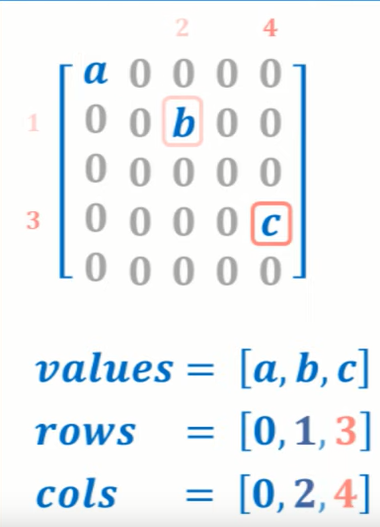

Inconvenient de ces méthodes : si une nouvelle catégorie dans le test set et qu'on lui demande d'être transformé, une erreur apparait

## Normalisation

Consiste à modifier la valeurs des variables quantitatives en conservant les proportions de distance entre chaque mesure 

Rends plus efficace les algo de machine learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

### MinMaxScaler
Normalise les données entre 0 et 1 en conservant les rapports de distance

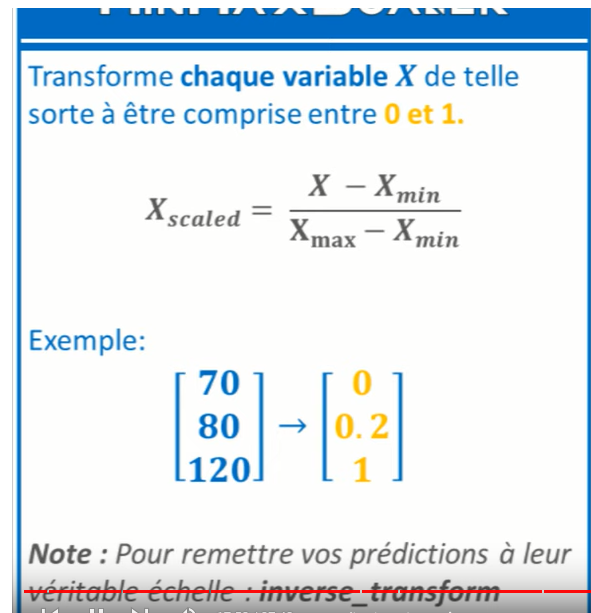

In [17]:
X = np.array([70, 80, 120])
X_test = np.array([[150]])
X = X.reshape(3,1)

In [18]:
# on entraine et on transforme sur le jeu d'entrainement
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [19]:
# on transforme sur le jeu de test
scaler.transform(X_test)

array([[1.6]])

In [20]:
scaler.inverse_transform(scaler.fit_transform(X))

array([[ 70.],
       [ 80.],
       [120.]])

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

In [22]:
scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

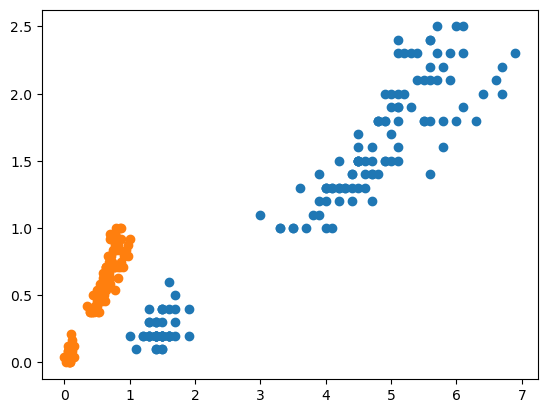

In [23]:
# visualisation avec l'echantillon transformé et non transformé
plt.scatter(X[:,2], X[:,3])
plt.scatter(X_scaler[:,2], X_scaler[:,3]);

### Standardisation

Pratique pour les support vector machine et les decompoistion... analysis

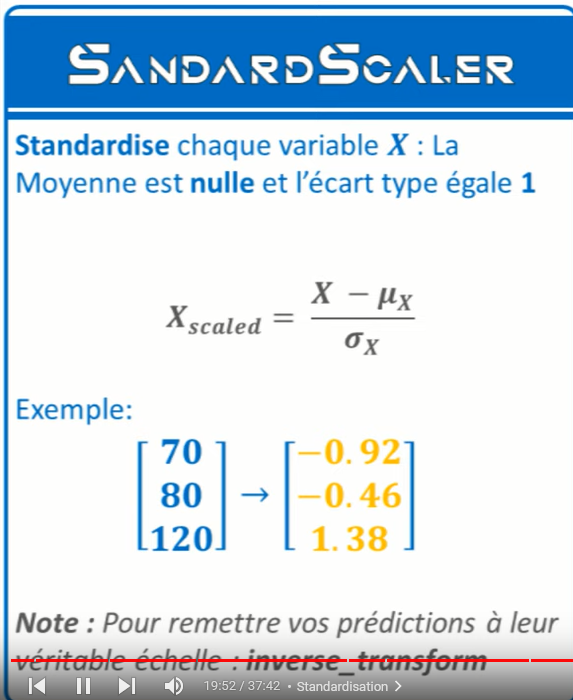

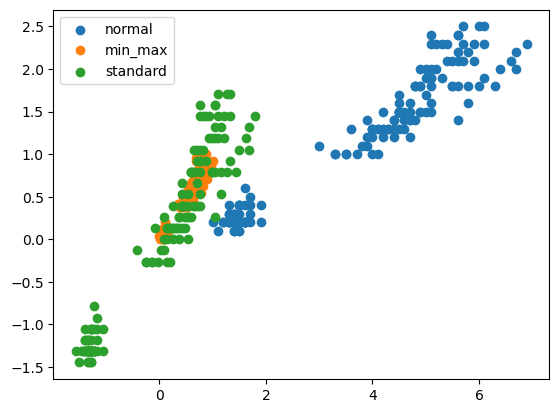

In [24]:
scaler = StandardScaler()
X_scaler2 = scaler.fit_transform(X)

# visualisation avec l'echantillon transformé et non transformé

plt.scatter(X[:,2], X[:,3], label = 'normal')
plt.scatter(X_scaler[:,2], X_scaler[:,3], label = 'min_max')
plt.scatter(X_scaler2[:,2], X_scaler2[:,3], label = 'standard')

plt.legend();

Inconvenient de ces 2 techniques : sensibles aux outliers

### RobustScaler

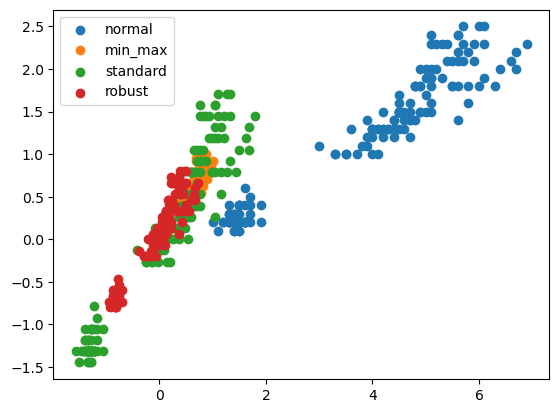

In [25]:
# utilise la médiane, est robuste aux outliers
scaler = RobustScaler()
X_scaler3 = scaler.fit_transform(X)

# visualisation avec l'echantillon transformé et non transformé

plt.scatter(X[:,2], X[:,3], label = 'normal')
plt.scatter(X_scaler[:,2], X_scaler[:,3], label = 'min_max')
plt.scatter(X_scaler2[:,2], X_scaler2[:,3], label = 'standard')
plt.scatter(X_scaler3[:,2], X_scaler3[:,3], label = 'robust')

plt.legend();

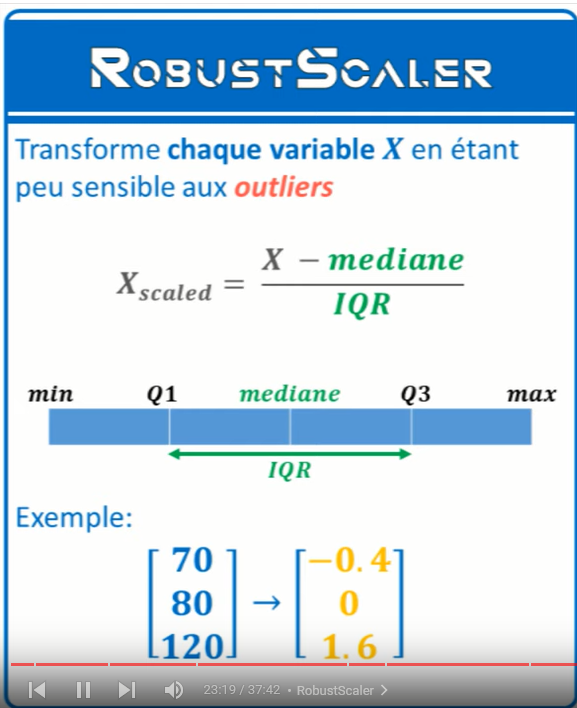

### Polynomiales features pour créer une matrix polynomiale à partir d'un vecteur

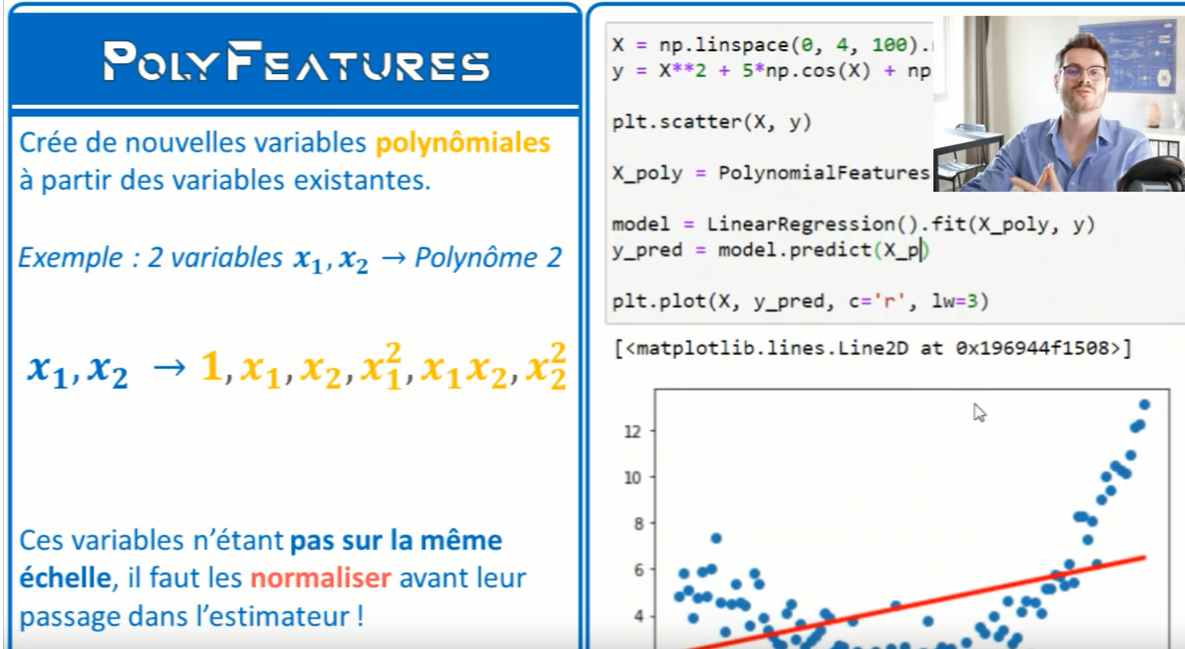

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

0.904029303896892

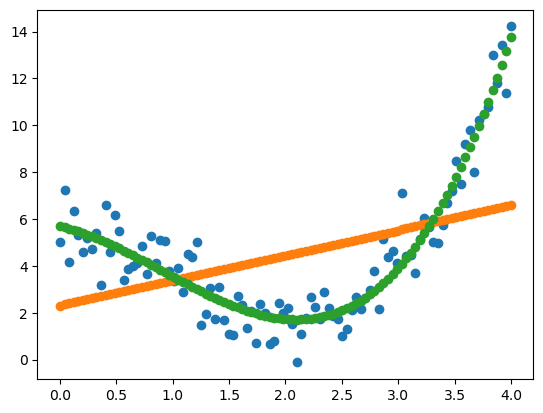

In [27]:
m = 100
X = np.linspace(0, 4, m).reshape((m, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(m, 1)

X_poly = PolynomialFeatures(3).fit_transform(X)

model2 = LinearRegression()
model2 = model2.fit(X_poly, y)
predict2 = model2.predict(X_poly)


model = LinearRegression()
model = model.fit(X, y)
predict = model.predict(X)

plt.scatter(X, y)
plt.scatter(X, predict)
plt.scatter(X, predict2)

model2.score(X_poly, y)

### Pipeline
Transform + Estimateur

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split    

In [29]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
     

model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)
     

from sklearn.model_selection import GridSearchCV
     

model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))
params = {
    'polynomialfeatures__degree':[2, 3, 4],
    'sgdclassifier__penalty':['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)
     

grid.score(X_test, y_test)

0.9736842105263158

# Vidéo FR SKLEARN PIPELINE AVANCÉE 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier
from sklearn.compose import make_column_transformer
import seaborn as sns

In [31]:
# préparation des données

titanic = sns.load_dataset('titanic')

titanic = titanic.drop(columns=['deck'])

titanic = titanic.dropna().reset_index(drop=True)

### Colonnes numériques

In [32]:
numeric_column = titanic.select_dtypes(include=['int', 'float']).columns.to_list()

In [33]:
# Applique une transformation du dataset sur certaines colonnes seulement
transformer = make_column_transformer((StandardScaler(), numeric_column))

In [34]:
# entrainement du transformer sur les colonnes concernées uniquement
transformer.fit_transform(titanic)

array([[-0.82416338,  0.90859974, -0.52766856,  0.52251079, -0.50678737,
        -0.51637992],
       [ 1.21335165, -1.48298257,  0.57709388,  0.52251079, -0.50678737,
         0.69404605],
       [ 1.21335165,  0.90859974, -0.25147795, -0.55271372, -0.50678737,
        -0.50362035],
       ...,
       [ 1.21335165, -1.48298257, -0.73481151, -0.55271372, -0.50678737,
        -0.08633507],
       [ 1.21335165, -1.48298257, -0.25147795, -0.55271372, -0.50678737,
        -0.08633507],
       [-0.82416338,  0.90859974,  0.16280796, -0.55271372, -0.50678737,
        -0.50692839]])

### Autres colonnes, obligation de les transformer avant

In [35]:
categorical_column = titanic.select_dtypes(exclude=['int', 'float']).columns.to_list()

In [36]:
titanic[categorical_column]

,sex,embarked,class,who,adult_male,embark_town,alive,alone
0,male,S,Third,man,True,Southampton,no,False
1,female,C,First,woman,False,Cherbourg,yes,False
2,female,S,Third,woman,False,Southampton,yes,True
3,female,S,First,woman,False,Southampton,yes,False
4,male,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...
707,female,Q,Third,woman,False,Queenstown,no,False
708,male,S,Second,man,True,Southampton,no,True
709,female,S,First,woman,False,Southampton,yes,True
710,male,C,First,man,True,Cherbourg,yes,True


In [37]:
encoder = OrdinalEncoder()
titanic_categorical_transform = encoder.fit_transform(titanic[categorical_column])
titanic_categorical_transform

array([[1., 2., 2., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 2., 2., ..., 2., 1., 1.],
       ...,
       [0., 2., 0., ..., 2., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 1., 2., ..., 1., 0., 1.]])

In [38]:
# pour rétrouver les valeurs de base
encoder.inverse_transform(titanic_categorical_transform)

array([['male', 'S', 'Third', ..., 'Southampton', 'no', False],
       ['female', 'C', 'First', ..., 'Cherbourg', 'yes', False],
       ['female', 'S', 'Third', ..., 'Southampton', 'yes', True],
       ...,
       ['female', 'S', 'First', ..., 'Southampton', 'yes', True],
       ['male', 'C', 'First', ..., 'Cherbourg', 'yes', True],
       ['male', 'Q', 'Third', ..., 'Queenstown', 'no', True]],
      dtype=object)

#### Transformation en binaire

In [39]:
encoder = OneHotEncoder()
titanic_categorical_transform_binary = encoder.fit_transform(titanic[categorical_column])

### Pipeline de la vidéo

In [40]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [41]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

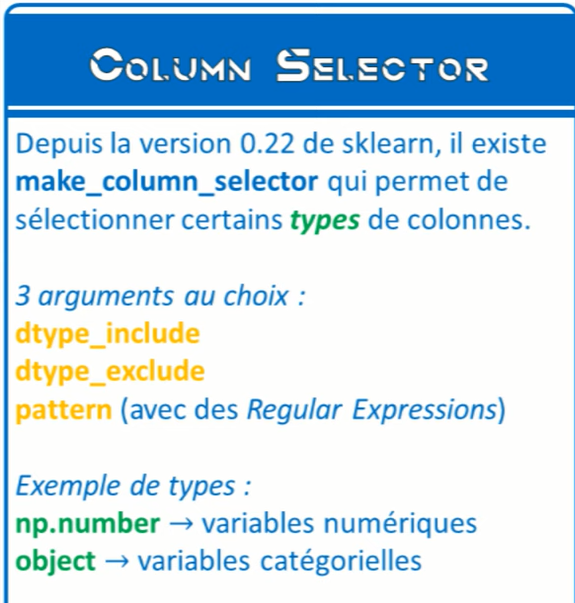

In [43]:
# définition des 2 types de colonnes
numeric_column = titanic.select_dtypes(include=['int', 'float']).columns.to_list()
numeric_column.remove('survived')
categorical_column = titanic.select_dtypes(exclude=['int', 'float']).columns.to_list()

In [44]:
# création des 2 pipelines en fonction du type des colonnes
# le pipeline est une chaine de transformation
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [45]:
# transformation du dataset titanic avec les 2 pipeline
preprocessor = make_column_transformer((numerical_pipeline, numeric_column), (categorical_pipeline, categorical_column))

In [46]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['pclass', 'age', 'sibsp', 'parch', 'fare']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['sex', 'embarked', 'class', 'who',
                                  'adult_male', 'embark_town', 'alive',
                                  'alone'])])

In [47]:
# création du pipeline final
model = make_pipeline(preprocessor, SGDClassifier())
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pclass', 'age', 'sibsp',
                                                   'parch', 'fare']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   O

In [48]:
model.score(X_test, y_test)

1.0

In [49]:
SGDClassifier().get_params().keys()

dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

## Make Union : Pipeline parallèle

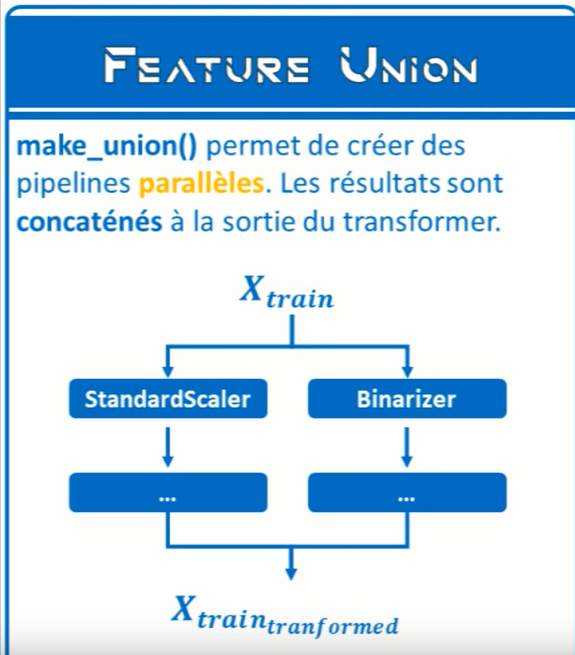

In [50]:
from sklearn.pipeline import make_union
from sklearn.preprocessing import Binarizer

In [51]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [52]:
numerical_features = titanic[['age', 'fare']]

In [53]:
# pipeline en parallèle
pipeline = make_union(StandardScaler(), Binarizer())

In [54]:
# fait les transformation en parallèle puis concatène
pipeline.fit_transform(numerical_features)

array([[-0.52766856, -0.51637992,  1.        ,  1.        ],
       [ 0.57709388,  0.69404605,  1.        ,  1.        ],
       [-0.25147795, -0.50362035,  1.        ,  1.        ],
       ...,
       [-0.73481151, -0.08633507,  1.        ,  1.        ],
       [-0.25147795, -0.08633507,  1.        ,  1.        ],
       [ 0.16280796, -0.50692839,  1.        ,  1.        ]])

# Bonus Imputers : SKLEARN IMPUTER : NETTOYAGE DE DONNÉES 

In [55]:
from sklearn.impute import SimpleImputer

In [56]:
X = sns.load_dataset('titanic')['deck'].to_numpy()
X = X.reshape(X.shape[0], 1)
X[:10]

array([[nan],
       ['C'],
       [nan],
       ['C'],
       [nan],
       [nan],
       ['E'],
       [nan],
       [nan],
       [nan]], dtype=object)

In [57]:
# Utilisation du transformeur SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent' )
imputer.fit_transform(X)[:10]
# si on utilise ce transformeur sur un autre échantillon ou la valeur la plus fréquente est A, il remplacera quand meme les
# valeur manquantes par C car le transformeur a été entrainé sur un echantillon ou la valeur la + fréquente etait C

array([['C'],
       ['C'],
       ['C'],
       ['C'],
       ['C'],
       ['C'],
       ['E'],
       ['C'],
       ['C'],
       ['C']], dtype=object)

### KNNImputer

In [58]:
from sklearn.impute import KNNImputer

In [59]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, 20]])

In [60]:
# remplace les valeurs manquantes par la valeur des lignes qui ont les features les plus semblables
imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(X)

array([[  1., 100.],
       [  2.,  30.],
       [  3.,  15.],
       [  3.,  20.]])

### MissingIndicator

In [61]:
# renvoie un booléen qui indique où sont les valeurs manquantes
from sklearn.impute import MissingIndicator

In [62]:
X = np.array([[1, 100],
             [2, 30],
             [3, 15],
             [np.nan, np.nan]])

In [63]:
MissingIndicator().fit_transform(X)

array([[False, False],
       [False, False],
       [False, False],
       [ True,  True]])

In [64]:
# le manque d'information devient ici une nouvelle information
pipeline = make_union(SimpleImputer(strategy='constant', fill_value=-99),
                     MissingIndicator())
pipeline.fit_transform(X)

array([[  1., 100.,   0.,   0.],
       [  2.,  30.,   0.,   0.],
       [  3.,  15.,   0.,   0.],
       [-99., -99.,   1.,   1.]])

#### Application

In [73]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [71]:
titanic = sns.load_dataset('titanic')
X = titanic[['pclass', 'age']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [66]:
# création du pipeline avec la transformation et le type d'algo 
model = make_pipeline(KNNImputer(), SGDClassifier())

In [67]:
# la grille d'hyperparamètre
params = {
    'knnimputer__n_neighbors' : [1, 2, 3, 4]
}

In [68]:
# GridSearchCV avec le modele, la grille et le nombre de split de cross validation
grid = GridSearchCV(model, param_grid=params, cv=4)
grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'knnimputer__n_neighbors': [1, 2, 3, 4]})

In [69]:
grid.best_params_

{'knnimputer__n_neighbors': 1}

In [70]:
grid.score(X_test, y_test)

0.6905829596412556